In [13]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Loading dataset
df = pd.read_csv('winequality-red.csv')

# Find null values
null_values = df.isnull().sum()

print(null_values)

# Defining feature and target variables
X = df.drop('quality', axis=1)
y = df['quality']

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating an instance of Random Forest classifier
model = RandomForestClassifier()

# Fitting the model to the training data
model.fit(X_train, y_train)

# Predicting on the testing data
y_pred = model.predict(X_test)

# Printing the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print(df.head(5))

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Accuracy: 0.659375
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                 

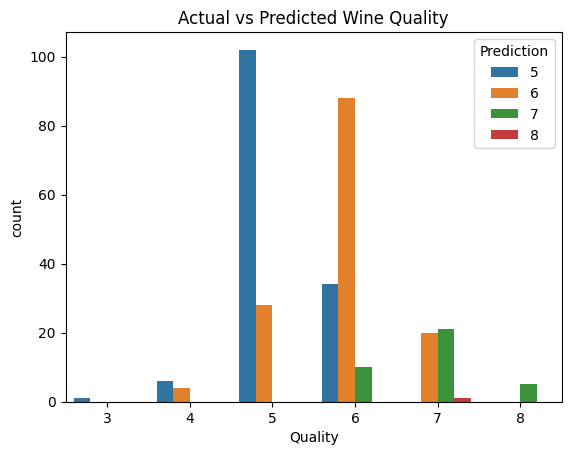

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=y_test, hue=y_pred)
plt.xlabel('Quality')
plt.title('Actual vs Predicted Wine Quality')
plt.legend(title='Prediction', loc='upper right')
plt.show()

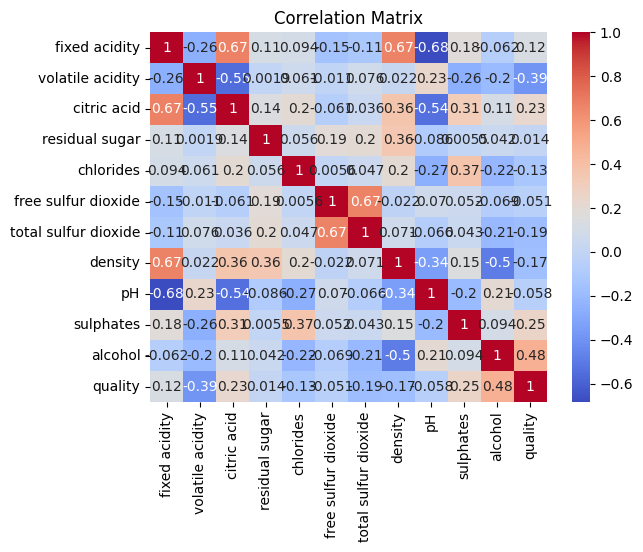

In [6]:
# Creating a correlation matrix
corr_matrix = df.corr()

# Creating a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

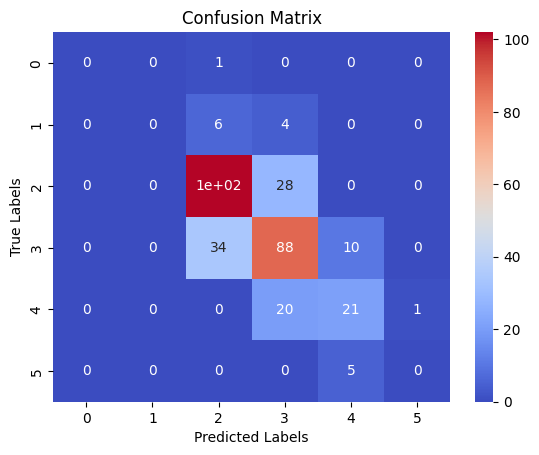

In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Creating a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()






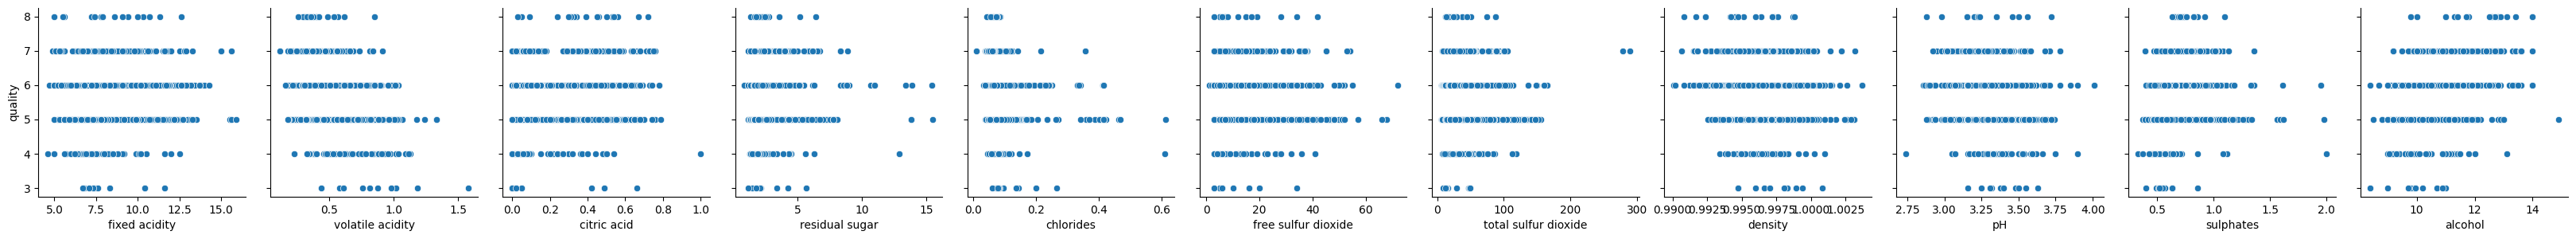

In [9]:
# Creating a pairplot of features vs quality
sns.pairplot(data=df, x_vars=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                              'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
             y_vars=['quality'], height=3, aspect=1, diag_kind='hist')
plt.show()

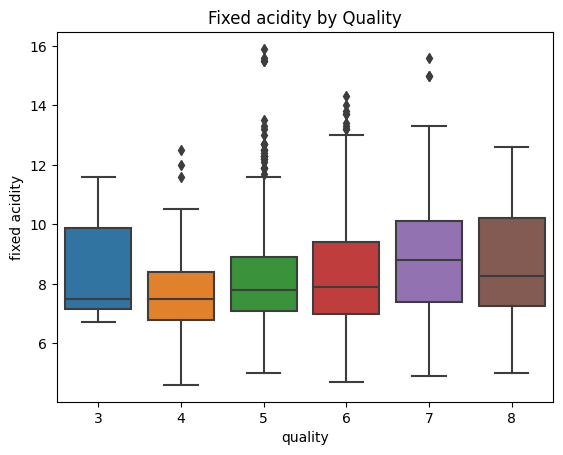

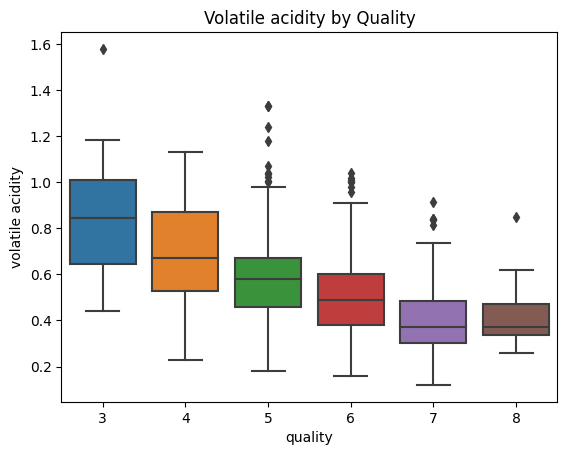

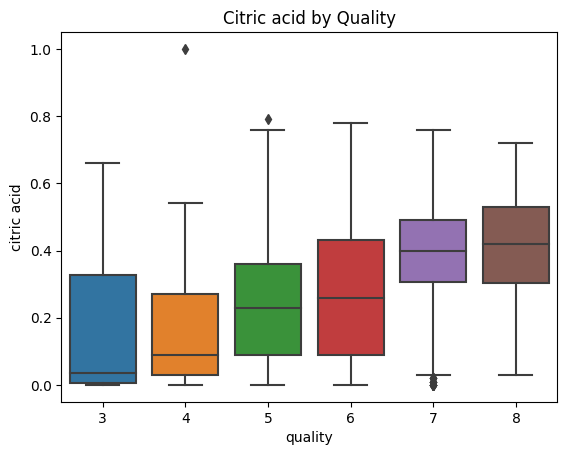

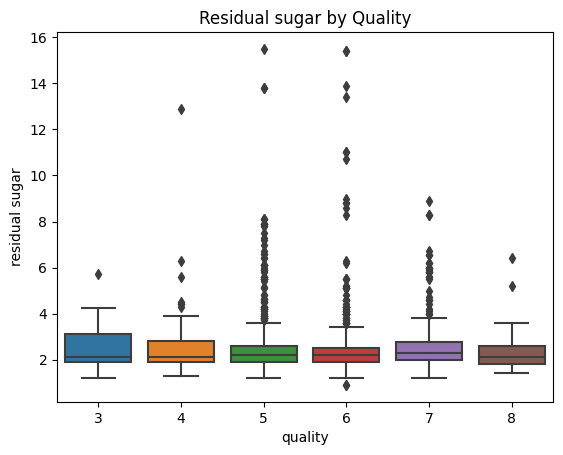

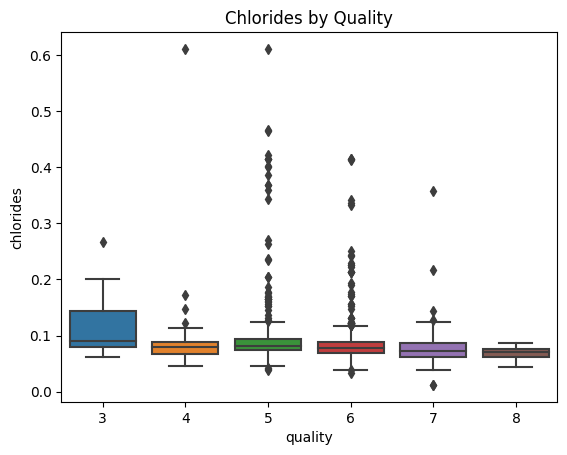

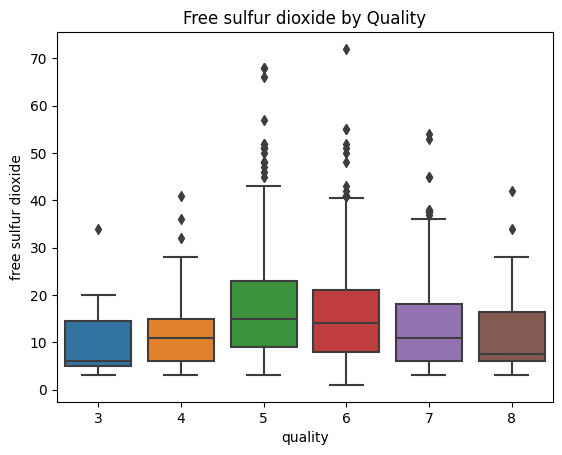

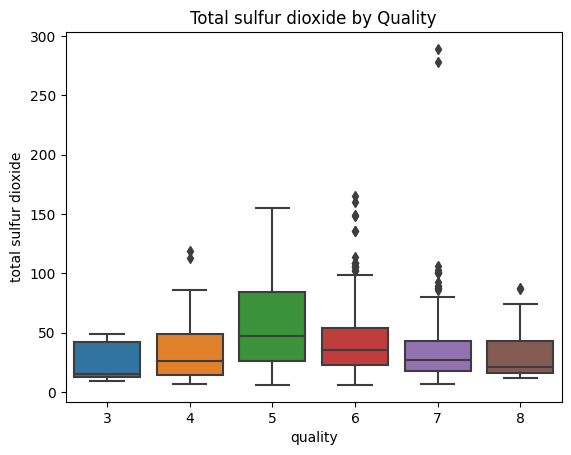

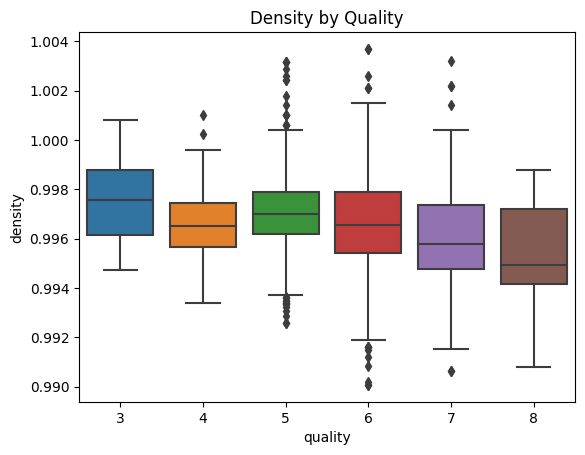

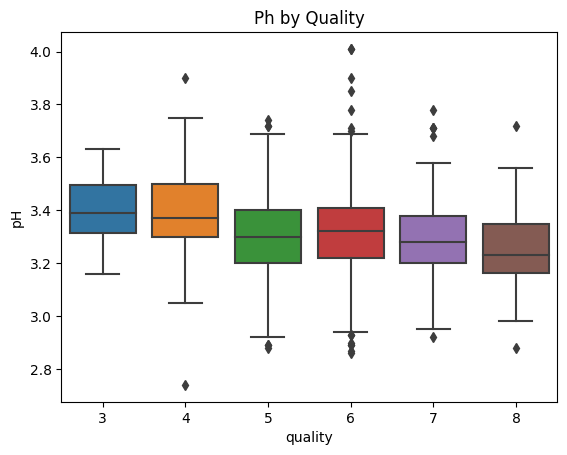

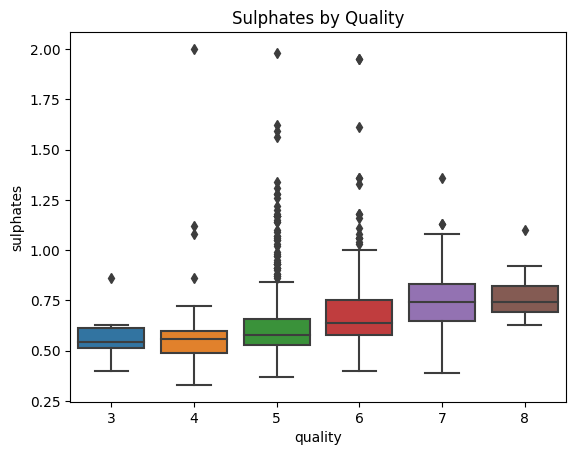

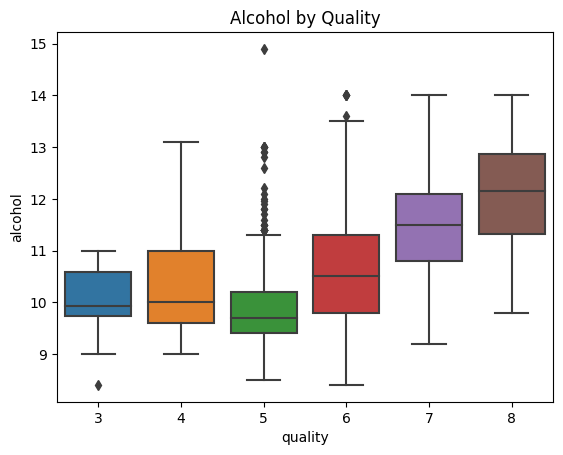

In [10]:
# Creating a boxplot of each feature by quality
for col in df.columns[:-1]:
    sns.boxplot(x='quality', y=col, data=df)
    plt.title(f'{col.capitalize()} by Quality')
    plt.show()

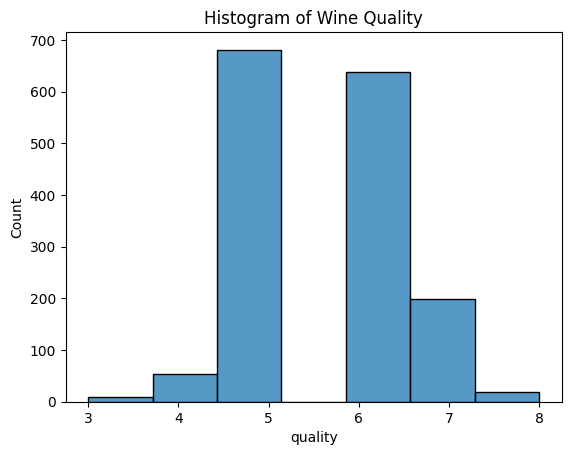

In [11]:
# Creating a histogram of the target variable
sns.histplot(x='quality', data=df, bins=7)
plt.title('Histogram of Wine Quality')
plt.show()

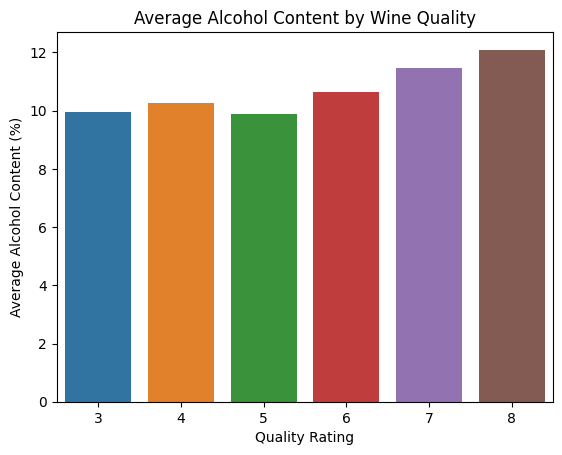

In [12]:
# Calculating the average value of each feature by quality
avg_by_quality = df.groupby('quality').mean()

# Creating a barplot of average feature values by quality
sns.barplot(x=avg_by_quality.index, y='alcohol', data=avg_by_quality)
plt.title('Average Alcohol Content by Wine Quality')
plt.xlabel('Quality Rating')
plt.ylabel('Average Alcohol Content (%)')
plt.show()